# Fraud Transaction Detection

In this notebook, we will explore a task aimed at identifying fraudulent and valid transactions using a logistic regression model. This work is a part of my Data Science Internship, where I focused on developing and evaluating machine learning models to detect fraudulent activities in transaction data.

The process involves the following steps:

1. **Data Preprocessing**: Cleaning and preparing the dataset for modeling.
2. **Exploratory Data Analysis**: Analyzing the distribution of the target variable (fraudulent vs. valid transactions).
3. **Model Building**: Implementing a logistic regression model to classify transactions.
4. **Model Evaluation**: Assessing the performance of the model using appropriate metrics.


## Importing Libraries and Loading the Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
ftd = pd.read_csv('C:/Users/Agamya/Desktop/AGAMYA/Agu_CSV/creditcard.csv')

In [4]:
print(ftd.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(ftd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Preprocessing
Check for missing values and scale the features. The dataset is already anonymized and scaled (except for the 'Amount' column),  so scale only the 'Amount' column.

In [6]:
# Check for missing values
print(ftd.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


##  Exploratory Data Analysis (EDA)
Analyzing the distribution of the 'Class' column to understand the imbalance in the dataset.

In [7]:
# Scale the 'Amount' column
sc = StandardScaler()
ftd['Amount'] = sc.fit_transform(ftd[['Amount']])

# Display the first few rows after scaling
print(ftd.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [8]:
ftd.shape

(284807, 31)

In [9]:
# Dropping Time column
ftd = ftd.drop(['Time'],axis=1)

In [10]:
ftd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
# Checking for duplicate values
ftd.duplicated().any()

True

In [12]:
# Dropping the duplicates
ftd = ftd.drop_duplicates()

In [13]:
ftd.shape

(275663, 30)

In [14]:
284807- 275663

9144

#####  There are about 9144 duplicate rows in the dataframe

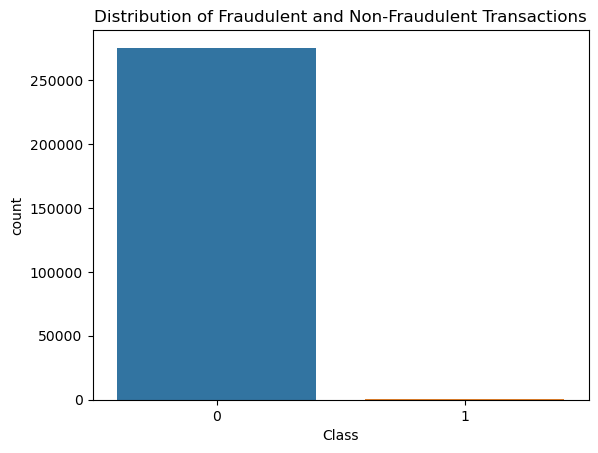

Class
0    275190
1       473
Name: count, dtype: int64


In [15]:
# Plot the distribution of the 'Class' column
sns.countplot(x='Class', data=ftd)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

# Display the count of each class
print(ftd['Class'].value_counts())

#### Number of Fraud Transactions - 473
#### Number of Valid/Legit Transactions - 275190

In [16]:
valid = ftd[ftd.Class == 0]
fraud = ftd[ftd.Class == 1]

In [17]:
print(valid.shape)
print(fraud.shape)

(275190, 30)
(473, 30)


In [18]:
valid.Amount.describe()

count    275190.000000
mean          0.008682
std           1.012309
min          -0.353229
25%          -0.327682
50%          -0.258275
75%          -0.033782
max         102.362243
Name: Amount, dtype: float64

In [19]:
fraud.Amount.describe()

count    473.000000
mean       0.142021
std        1.040346
min       -0.353229
25%       -0.349231
50%       -0.313968
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

In [20]:
# Comparing the values for both transactions
ftd.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.029792,-0.008288,0.037131,-0.012054,-0.005596,-0.011768,0.017497,-0.007346,-0.008050,0.012492,...,0.002717,0.001781,0.005689,-0.001779,-0.006696,-0.004890,-0.000327,0.001557,0.000771,0.008682
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.142021


### Under-Sampling

Building a sample dataset containing similar distribution of Valid transactions and Fraudulent Transactions.                      
Since number of Valid transactions are very much higher than Fradulent transactions.                                            
Selecting random Valid transactions to match the number of Fraudulent transactions so that both dataframes will contain 473 rows of data.

In [21]:
valid_sample = valid.sample(n=473)

In [22]:
# Concatenating two DataFrames
new_dataset = pd.concat([valid_sample, fraud], axis=0)

In [23]:
new_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
40293,1.256046,0.367624,0.309890,0.691839,-0.355091,-1.068786,0.099932,-0.214708,0.003670,-0.288344,...,-0.285290,-0.814417,0.126922,0.350585,0.222433,0.093745,-0.021866,0.031267,-0.345313,0
87578,1.153504,-0.706298,-0.062553,-1.403545,-0.851815,-0.858411,-0.191992,0.010353,1.527570,-0.930381,...,-0.170935,-0.581912,-0.087286,-0.021106,0.421944,-0.137928,-0.025865,0.007647,-0.048855,0
93644,-0.349886,0.153876,1.031086,-1.874714,-0.162995,-0.731964,1.019139,-0.454141,-1.270180,0.323019,...,0.261373,0.829275,-0.102301,-0.080074,0.044291,-0.326046,0.167735,-0.018276,0.043461,0
197986,-1.968088,-1.329239,-1.065029,0.042493,0.197063,-0.259303,3.566900,-0.531554,-1.569664,-1.012111,...,0.769208,0.953126,0.816080,-0.363970,1.697603,0.749934,-0.300064,0.069120,2.305498,0
196633,1.891979,-0.704512,-0.075397,0.669477,-0.982794,0.427608,-1.376072,0.354835,2.176753,-0.714793,...,0.050322,0.460914,0.184656,0.534877,-0.443219,0.667431,0.028676,-0.000548,-0.229329,0


In [24]:
new_dataset.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1
281674,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,-0.183191,1


In [25]:
new_dataset['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [26]:
new_dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.078942,-0.139743,-0.049685,-0.055303,0.002242,-0.012974,0.112936,-0.016282,0.022949,-0.033424,...,0.067877,0.030412,0.035843,0.011830,0.008711,-0.037524,-0.002182,-0.011741,0.019619,0.113430
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.142021


In [27]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [28]:
print(X)

              V1        V2        V3        V4        V5        V6        V7  \
40293   1.256046  0.367624  0.309890  0.691839 -0.355091 -1.068786  0.099932   
87578   1.153504 -0.706298 -0.062553 -1.403545 -0.851815 -0.858411 -0.191992   
93644  -0.349886  0.153876  1.031086 -1.874714 -0.162995 -0.731964  1.019139   
197986 -1.968088 -1.329239 -1.065029  0.042493  0.197063 -0.259303  3.566900   
196633  1.891979 -0.704512 -0.075397  0.669477 -0.982794  0.427608 -1.376072   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10  .

In [29]:
print(Y)

40293     0
87578     0
93644     0
197986    0
196633    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


#### Total data is split into 80%->training data and 20%->test data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(946, 29) (756, 29) (190, 29)


## Model Building  

### Logistic Regression

In [32]:
ccmodel = LogisticRegression()

In [33]:
# training the Logistic Regression Model with Training Data
ccmodel.fit(X_train, Y_train)

LogisticRegression()

In [34]:
# accuracy on training data
X_train_prediction = ccmodel.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.951058201058201


In [36]:
# accuracy on test data
X_test_prediction = ccmodel.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [37]:
print('Accuracy on Test Data : ', test_data_accuracy)

Accuracy on Test Data :  0.9473684210526315


### Random Forest

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [39]:
Y_predtrain = rf.predict(X_test)

In [40]:
accuracy_score(Y_test,Y_predtrain)

0.9473684210526315

## Summary

### Logistic Regression

Accuracy on Training data :  0.951058201058201

Accuracy on Test Data :  0.9473684210526315


### Random Forest

Accuracy score :  0.9473684210526315